Movielens Case Study.

DESCRIPTION

Background of Problem Statement :

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. Members of the GroupLens Research Project are involved in many research projects related to the fields of information filtering, collaborative filtering, and recommender systems. The project is led by professors John Riedl and Joseph Konstan. The project began to explore automated collaborative filtering in 1992 but is most well known for its worldwide trial of an automated collaborative filtering system for Usenet news in 1996. Since then the project has expanded its scope to research overall information by filtering solutions, integrating into content-based methods, as well as, improving current collaborative filtering technology.

Problem Objective :

Here, we ask you to perform the analysis using the Exploratory Data Analysis technique. You need to find features affecting the ratings of any particular movie and build a model to predict the movie ratings.

Domain: Entertainment

Analysis Tasks to be performed:

    Import the three datasets
    Create a new dataset [Master_Data] with the following columns MovieID Title UserID Age Gender Occupation Rating. (Hint: (i) Merge two tables at a time. (ii) Merge the tables using two primary keys MovieID & UserId)
    Explore the datasets using visual representations (graphs or tables), also include your comments on the following:

    User Age Distribution
    User rating of the movie “Toy Story”
    Top 25 movies by viewership rating
    Find the ratings for all the movies reviewed by for a particular user of user id = 2696

    Feature Engineering:

            Use column genres:

    Find out all the unique genres (Hint: split the data in column genre making a list and then process the data to find out only the unique categories of genres)
    Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 
    Determine the features affecting the ratings of any particular movie.
    Develop an appropriate model to predict the movie ratings

Dataset Description :

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies made by 6,040 MovieLens users who joined MovieLens in 2000.

Ratings.dat
    Format - UserID::MovieID::Rating::Timestamp
Field 	Description
UserID 	Unique identification for each user
MovieID 	Unique identification for each movie
Rating 	User rating for each movie
Timestamp 	Timestamp generated while adding user review

    UserIDs range between 1 and 6040 
    The MovieIDs range between 1 and 3952
    Ratings are made on a 5-star scale (whole-star ratings only)
    A timestamp is represented in seconds since the epoch is returned by time(2)
    Each user has at least 20 ratings

     

Users.dat
Format -  UserID::Gender::Age::Occupation::Zip-code
Field 	Description
UserID 	Unique identification for each user
Genere 	Category of each movie
Age 	User’s age
Occupation 	User’s Occupation
Zip-code 	Zip Code for the user’s location

All demographic information is provided voluntarily by the users and is not checked for accuracy. Only users who have provided demographic information are included in this data set.

    Gender is denoted by an "M" for male and "F" for female
    Age is chosen from the following ranges:

 
Value 	Description
1 	"Under 18"
18 	"18-24"
25 	"25-34"
35 	"35-44"
45 	"45-49"
50 	"50-55"
56 	"56+"

 

    Occupation is chosen from the following choices:

Value
  	Description
0 	"other" or not specified
1 	"academic/educator"
2 	"artist”
3 	"clerical/admin"
4 	"college/grad student"
5 	"customer service"
6 	"doctor/health care"
7 	"executive/managerial"
8 	"farmer"
9 	"homemaker"
10 	"K-12 student"
11 	"lawyer"
12 	"programmer"
13 	"retired"
14 	 "sales/marketing"
15 	"scientist"
16 	 "self-employed"
17 	"technician/engineer"
18 	"tradesman/craftsman"
19 	"unemployed"
20 	"writer”


Movies.dat
Format - MovieID::Title::Genres
Field 	Description
MovieID 	Unique identification for each movie
Title 	A title for each movie
Genres 	Category of each movie

 

     Titles are identical to titles provided by the IMDB (including year of release)

 

    Genres are pipe-separated and are selected from the following genres:

    Action
    Adventure
    Animation
    Children's
    Comedy
    Crime
    Documentary
    Drama
    Fantasy
    Film-Noir
    Horror
    Musical
    Mystery
    Romance
    Sci-Fi
    Thriller
    War
    Western

    Some MovieIDs do not correspond to a movie due to accidental duplicate entries and/or test entries
    Movies are mostly entered by hand, so errors and inconsistencies may exist


In [1]:
import pandas as pd
import numpy as np
import scipy.io

In [2]:
with open('../project/Projects for Submission/Project4_Movielens/README','r') as f:
    lines = f.read()
    lines=lines.rstrip()
    print(lines)

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

In [3]:
ratings=pd.read_csv('../project/Projects for Submission/Project4_Movielens/ratings.dat', delimiter='::', header=None)
ratings.columns=['UserID','MovieID','Rating','Timestamp']
ratings.head()

/home/martha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [4]:
ratings.shape

(1000209, 4)

In [5]:
ratings.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

In [6]:
dupl_ratn=ratings[ratings.duplicated()]
print(dupl_ratn)

Empty DataFrame
Columns: [UserID, MovieID, Rating, Timestamp]
Index: []


In [7]:
users=pd.read_csv('../project/Projects for Submission/Project4_Movielens/users.dat',delimiter='::', header=None)
users.columns=['UserID','Gender','Age','Occupation','Zip-code']
users.head()

/home/martha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
users.shape

(6040, 5)

In [9]:
users.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
Zip-code      0
dtype: int64

In [10]:



dupl_users=users[users.duplicated()]
print(dupl_users)

Empty DataFrame
Columns: [UserID, Gender, Age, Occupation, Zip-code]
Index: []


In [11]:
movies=pd.read_csv('../project/Projects for Submission/Project4_Movielens/movies.dat',delimiter='::', header=None)
movies.columns=['MovieID','Title','Genres']
movies.head()

/home/martha/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [12]:
movie=movies.copy()
movie.head(2)

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy


In [13]:
movies.shape

(3883, 3)

In [14]:
movies.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [15]:
dupl_movies=movies[movies.duplicated()]
print(dupl_movies)

Empty DataFrame
Columns: [MovieID, Title, Genres]
Index: []


In [16]:
movies['Genres'].value_counts()

Drama                                   843
Comedy                                  521
Horror                                  178
Comedy|Drama                            162
Comedy|Romance                          142
                                       ... 
Action|Adventure|Animation                1
Romance|Western                           1
Drama|Mystery|Sci-Fi|Thriller             1
Action|Adventure|Crime|Thriller           1
Action|Adventure|Sci-Fi|Thriller|War      1
Name: Genres, Length: 301, dtype: int64

In [17]:
movies['Genres'].nunique()

301

In [18]:
genr_movie=pd.concat([movie,movie.Genres.str.get_dummies()],axis=1)
genr_movie

,MovieID,Title,Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Animation|Children's|Comedy,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,0,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,3948,Meet the Parents (2000),Comedy,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3879,3949,Requiem for a Dream (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3880,3950,Tigerland (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3881,3951,Two Family House (2000),Drama,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
movie_g=genr_movie.pop('Genres')

In [20]:
genr_movie.head()

,MovieID,Title,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
tab=pd.merge(ratings,genr_movie)
tab

,UserID,MovieID,Rating,Timestamp,Title,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000205,5675,2703,3,976029116,Broken Vessels (1998),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000206,5780,2845,1,958153068,White Boys (1999),0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000207,5851,3607,5,957756608,One Little Indian (1973),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [22]:
table=pd.merge(tab,users)
table

,UserID,MovieID,Rating,Timestamp,Title,Action,Adventure,Animation,Children's,Comedy,...,Mystery,Romance,Sci-Fi,Thriller,War,Western,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),0,0,0,0,0,...,0,0,0,0,0,0,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),0,0,1,1,0,...,0,0,0,0,0,0,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),0,0,0,0,0,...,0,1,0,0,0,0,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),0,0,0,0,0,...,0,0,0,0,0,0,F,1,10,48067
4,1,2355,5,978824291,"Bug's Life, A (1998)",0,0,1,1,1,...,0,0,0,0,0,0,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),0,0,0,0,0,...,0,0,0,0,0,0,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),0,0,0,0,0,...,0,0,0,0,0,1,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),0,0,0,0,0,...,0,0,0,0,0,0,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),1,0,0,0,0,...,0,0,0,0,1,0,M,45,5,77662


In [23]:
table.keys()

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Action',
       'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [24]:
gen=movie.Genres.str.get_dummies()
gen.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [25]:
table['Gender']= table['Gender'].map({'F':1, 'M':0}, na_action= 'ignore')
table=table[['UserID','MovieID','Title','Age','Gender','Occupation','Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western','Timestamp','Zip-code','Rating']]
table

,UserID,MovieID,Title,Age,Gender,Occupation,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Timestamp,Zip-code,Rating
0,1,1193,One Flew Over the Cuckoo's Nest (1975),1,1,10,0,0,0,0,...,0,0,0,0,0,0,0,978300760,48067,5
1,1,661,James and the Giant Peach (1996),1,1,10,0,0,1,1,...,1,0,0,0,0,0,0,978302109,48067,3
2,1,914,My Fair Lady (1964),1,1,10,0,0,0,0,...,1,0,1,0,0,0,0,978301968,48067,3
3,1,3408,Erin Brockovich (2000),1,1,10,0,0,0,0,...,0,0,0,0,0,0,0,978300275,48067,4
4,1,2355,"Bug's Life, A (1998)",1,1,10,0,0,1,1,...,0,0,0,0,0,0,0,978824291,48067,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,Footloose (1984),45,0,5,0,0,0,0,...,0,0,0,0,0,0,0,965319075,77662,2
1000205,4211,3806,MacKenna's Gold (1969),45,0,5,0,0,0,0,...,0,0,0,0,0,0,1,965319138,77662,3
1000206,4211,3840,Pumpkinhead (1988),45,0,5,0,0,0,0,...,0,0,0,0,0,0,0,965319197,77662,4
1000207,4211,3766,Missing in Action (1984),45,0,5,1,0,0,0,...,0,0,0,0,0,1,0,965319138,77662,2


In [26]:
Master_table=table[['UserID','MovieID','Title','Age','Gender','Occupation','Rating']]
Master_table

,UserID,MovieID,Title,Age,Gender,Occupation,Rating
0,1,1193,One Flew Over the Cuckoo's Nest (1975),1,1,10,5
1,1,661,James and the Giant Peach (1996),1,1,10,3
2,1,914,My Fair Lady (1964),1,1,10,3
3,1,3408,Erin Brockovich (2000),1,1,10,4
4,1,2355,"Bug's Life, A (1998)",1,1,10,5
...,...,...,...,...,...,...,...
1000204,4211,3791,Footloose (1984),45,0,5,2
1000205,4211,3806,MacKenna's Gold (1969),45,0,5,3
1000206,4211,3840,Pumpkinhead (1988),45,0,5,4
1000207,4211,3766,Missing in Action (1984),45,0,5,2


User Age Distribution
Age is chosen from the following ranges:
Value Description 1 "Under 18", 18 "18-24", 25 "25-34", 35 "35-44", 45 "45-49", 50 "50-55", 56 "56+"


In [27]:
Master_table['Age'].value_counts()

25    395556
35    199003
18    183536
45     83633
50     72490
56     38780
1      27211
Name: Age, dtype: int64

In [28]:
Age_distribution=pd.crosstab(index=Master_table['Age'],columns='counts')
Age_distribution

col_0,counts
Age,
1,27211
18,183536
25,395556
35,199003
45,83633
50,72490
56,38780


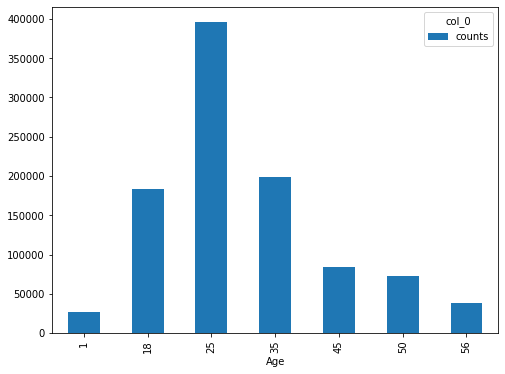

In [29]:
#to make barchart
Age_distribution.plot(kind='bar',figsize=(8,6))


##### We see that the age which gave the most rating is ages 25-34

Occupation is chosen from the following choices:
Value Description 0 "other" or not specified 1 "academic/educator" 2 "artist” 3 "clerical/admin" 
4 "college/grad student" 5 "customer service" 6 "doctor/health care" 7 "executive/managerial" 
8 "farmer" 9 "homemaker" 10 "K-12 student" 11 "lawyer" 12 "programmer" 13 "retired" 14 "sales/marketing"
15 "scientist" 16 "self-employed" 17 "technician/engineer" 18 "tradesman/craftsman" 19 "unemployed" 20 "writer”

In [30]:
Master_table['Occupation'].value_counts()

4     131032
0     130499
7     105425
1      85351
17     72816
20     60397
12     57214
2      50068
14     49109
16     46021
6      37205
3      31623
10     23290
15     22951
5      21850
11     20563
19     14904
13     13754
18     12086
9      11345
8       2706
Name: Occupation, dtype: int64

#### We see that Occupation 4 which is "college/grad student" has the most movie raters while farmers are the least movie raters

In [31]:
#Master_table[['Age','Occupation']]
Age_Occupation=pd.crosstab(index=Master_table['Occupation'],columns=Master_table['Age'])
Age_Occupation

Age,1,18,25,35,45,50,56
Occupation,,,,,,,
0,3844,17823,62185,24334,8254,11081,2978
1,686,6970,33862,17515,12562,8182,5574
2,268,8076,23419,9953,4297,2634,1421
3,0,3270,14694,7354,2933,1928,1444
4,221,88024,38971,3124,250,442,0
5,0,2560,10960,5549,2082,677,22
6,0,2038,12916,8742,4920,7302,1287
7,284,3739,43082,32866,11928,9856,3670
8,43,28,647,176,967,569,276


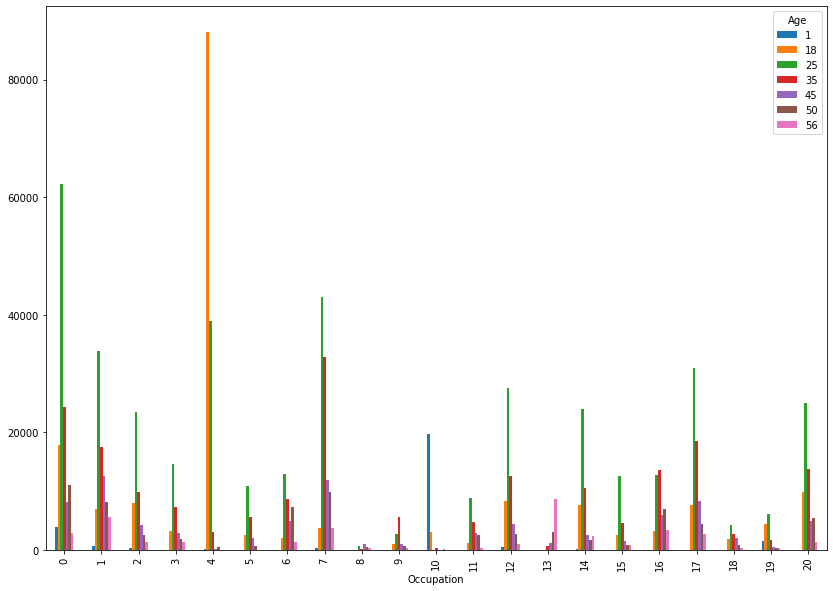

In [32]:
#to make barchart
Age_Occupation.plot(kind='bar',figsize=(14,10))


#### We see that amongst the movie raters: 

    "college/grad student" from ages 18 - 24 were the most movie raters,
    No  "college/grad student"  is 56+ years old
    No writer is under 18
    

User rating of the movie “Toy Story”

In [33]:

toystory=Master_table[Master_table['Title'].str.contains('Toy Story')==True]
toystory

,UserID,MovieID,Title,Age,Gender,Occupation,Rating
40,1,1,Toy Story (1995),1,1,10,5
50,1,3114,Toy Story 2 (1999),1,1,10,4
417,17,3114,Toy Story 2 (1999),50,0,1,5
634,18,1,Toy Story (1995),18,1,3,4
938,19,1,Toy Story (1995),1,0,10,5
...,...,...,...,...,...,...,...
994256,1025,3114,Toy Story 2 (1999),25,0,16,5
994289,1898,3114,Toy Story 2 (1999),25,0,12,5
994315,1970,3114,Toy Story 2 (1999),50,0,13,4
994367,4741,3114,Toy Story 2 (1999),35,0,7,4


In [34]:
toystory.Rating.unique()

array([5, 4, 3, 2, 1])

In [35]:
toystory.Title.unique()

array(['Toy Story (1995)', 'Toy Story 2 (1999)'], dtype=object)

In [36]:
toystory.Title.value_counts()

Toy Story (1995)      2077
Toy Story 2 (1999)    1585
Name: Title, dtype: int64

In [37]:
Master_table.groupby('Title').get_group('Toy Story 2 (1999)')

,UserID,MovieID,Title,Age,Gender,Occupation,Rating
50,1,3114,Toy Story 2 (1999),1,1,10,4
417,17,3114,Toy Story 2 (1999),50,0,1,5
944,19,3114,Toy Story 2 (1999),1,0,10,4
1816,39,3114,Toy Story 2 (1999),18,0,4,5
1882,42,3114,Toy Story 2 (1999),25,0,8,4
...,...,...,...,...,...,...,...
994256,1025,3114,Toy Story 2 (1999),25,0,16,5
994289,1898,3114,Toy Story 2 (1999),25,0,12,5
994315,1970,3114,Toy Story 2 (1999),50,0,13,4
994367,4741,3114,Toy Story 2 (1999),35,0,7,4


In [38]:
toystory_rating=pd.crosstab(index=toystory['Rating'],columns=toystory['Title'])
toystory_rating

Title,Toy Story (1995),Toy Story 2 (1999)
Rating,,
1,16,25
2,61,44
3,345,214
4,835,578
5,820,724


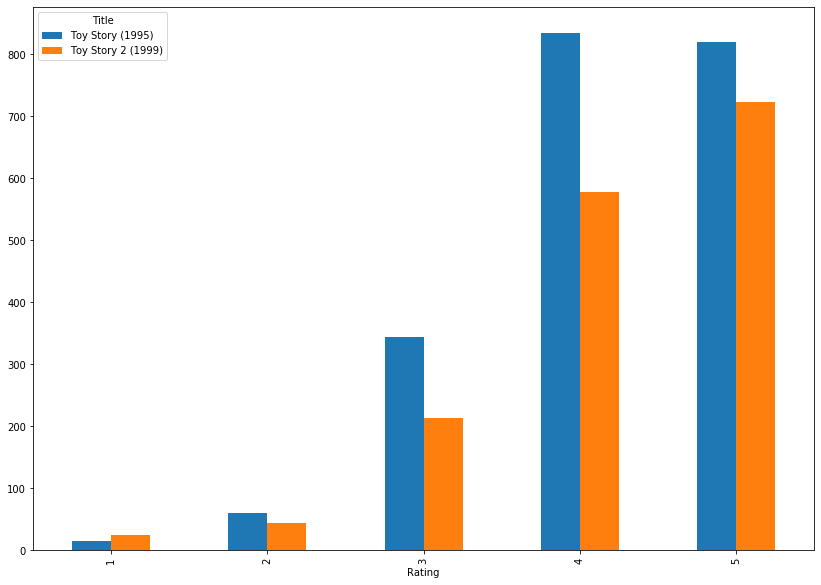

In [39]:
toystory_rating.plot(kind='bar',figsize=(14,10))

Top 25 movies by viewership rating

In [40]:
Topmovies = Master_table.groupby('Title').size().sort_values(ascending=False)
Top25=Topmovies[:26]
Top25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

In [41]:
Top25.index.tolist()

['American Beauty (1999)',
 'Star Wars: Episode IV - A New Hope (1977)',
 'Star Wars: Episode V - The Empire Strikes Back (1980)',
 'Star Wars: Episode VI - Return of the Jedi (1983)',
 'Jurassic Park (1993)',
 'Saving Private Ryan (1998)',
 'Terminator 2: Judgment Day (1991)',
 'Matrix, The (1999)',
 'Back to the Future (1985)',
 'Silence of the Lambs, The (1991)',
 'Men in Black (1997)',
 'Raiders of the Lost Ark (1981)',
 'Fargo (1996)',
 'Sixth Sense, The (1999)',
 'Braveheart (1995)',
 'Shakespeare in Love (1998)',
 'Princess Bride, The (1987)',
 "Schindler's List (1993)",
 'L.A. Confidential (1997)',
 'Groundhog Day (1993)',
 'E.T. the Extra-Terrestrial (1982)',
 'Star Wars: Episode I - The Phantom Menace (1999)',
 'Being John Malkovich (1999)',
 'Shawshank Redemption, The (1994)',
 'Godfather, The (1972)',
 'Forrest Gump (1994)']

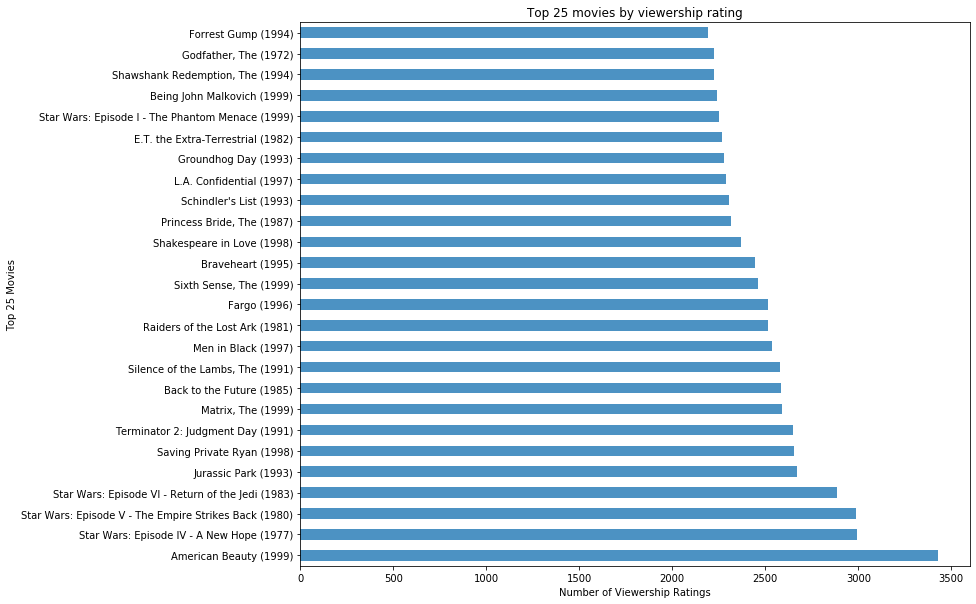

In [42]:
import matplotlib.pyplot as plt

Top25.plot(kind='barh',alpha=0.8,figsize=(12,10))
plt.xlabel("Number of Viewership Ratings")
plt.ylabel("Top 25 Movies")
plt.title("Top 25 movies by viewership rating")
plt.show()

Find the ratings for all the movies reviewed by for a particular user of user id = 2696

In [43]:
user_p=Master_table[Master_table['UserID']==2696]
user_p

,UserID,MovieID,Title,Age,Gender,Occupation,Rating
953847,2696,1270,Back to the Future (1985),25,0,7,2
953848,2696,1097,E.T. the Extra-Terrestrial (1982),25,0,7,3
953849,2696,1617,L.A. Confidential (1997),25,0,7,4
953850,2696,800,Lone Star (1996),25,0,7,5
953851,2696,3386,JFK (1991),25,0,7,1
953852,2696,3176,"Talented Mr. Ripley, The (1999)",25,0,7,4
953853,2696,1711,Midnight in the Garden of Good and Evil (1997),25,0,7,4
953854,2696,1589,Cop Land (1997),25,0,7,3
953855,2696,1783,Palmetto (1998),25,0,7,4
953856,2696,1892,"Perfect Murder, A (1998)",25,0,7,4


In [44]:
user_p[['Title','Rating']]

,Title,Rating
953847,Back to the Future (1985),2
953848,E.T. the Extra-Terrestrial (1982),3
953849,L.A. Confidential (1997),4
953850,Lone Star (1996),5
953851,JFK (1991),1
953852,"Talented Mr. Ripley, The (1999)",4
953853,Midnight in the Garden of Good and Evil (1997),4
953854,Cop Land (1997),3
953855,Palmetto (1998),4
953856,"Perfect Murder, A (1998)",4


Feature Engineering:

        Use column genres:

Find out all the unique genres (Hint: split the data in column genre making a list and then
                                process the data to find out only the unique categories of genres)
Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or
not the movie belongs to that genre. 
Determine the features affecting the ratings of any particular movie.
Develop an appropriate model to predict the movie ratings

In [45]:
table['Title'].value_counts()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
                                                         ... 
Beauty (1998)                                               1
Ulysses (Ulisse) (1954)                                     1
Outside Ozona (1998)                                        1
Choices (1981)                                              1
Small Faces (1995)                                          1
Name: Title, Length: 3706, dtype: int64

In [46]:
AB=table[table['Title']=='American Beauty (1999)']
AB

,UserID,MovieID,Title,Age,Gender,Occupation,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Timestamp,Zip-code,Rating
111,2,2858,American Beauty (1999),56,0,16,0,0,0,0,...,0,0,0,0,0,0,0,978298434,70072,4
230,15,2858,American Beauty (1999),25,0,7,0,0,0,0,...,0,0,0,0,0,0,0,978196348,22903,4
431,17,2858,American Beauty (1999),50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,978159467,95350,5
665,18,2858,American Beauty (1999),18,1,3,0,0,0,0,...,0,0,0,0,0,0,0,978156168,95825,5
957,19,2858,American Beauty (1999),1,0,10,0,0,0,0,...,0,0,0,0,0,0,0,982210072,48073,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998969,1410,2858,American Beauty (1999),50,0,7,0,0,0,0,...,0,0,0,0,0,0,0,974765178,94404,5
999186,600,2858,American Beauty (1999),35,0,17,0,0,0,0,...,0,0,0,0,0,0,0,975881562,66209,5
999209,3455,2858,American Beauty (1999),25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,967233220,07701,5
999232,3838,2858,American Beauty (1999),25,1,14,0,0,0,0,...,0,0,0,0,0,0,0,965920732,10033,5


##### We choose American Beauty (1999) because it has the most rating

Now lets find relevant features for it and build a model to predict its ratings.

In [47]:
AB['Rating'].value_counts()

5    1963
4     890
3     358
2     134
1      83
Name: Rating, dtype: int64

In [48]:
AB=AB.reset_index(drop=True)
AB

,UserID,MovieID,Title,Age,Gender,Occupation,Action,Adventure,Animation,Children's,...,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,Timestamp,Zip-code,Rating
0,2,2858,American Beauty (1999),56,0,16,0,0,0,0,...,0,0,0,0,0,0,0,978298434,70072,4
1,15,2858,American Beauty (1999),25,0,7,0,0,0,0,...,0,0,0,0,0,0,0,978196348,22903,4
2,17,2858,American Beauty (1999),50,0,1,0,0,0,0,...,0,0,0,0,0,0,0,978159467,95350,5
3,18,2858,American Beauty (1999),18,1,3,0,0,0,0,...,0,0,0,0,0,0,0,978156168,95825,5
4,19,2858,American Beauty (1999),1,0,10,0,0,0,0,...,0,0,0,0,0,0,0,982210072,48073,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3423,1410,2858,American Beauty (1999),50,0,7,0,0,0,0,...,0,0,0,0,0,0,0,974765178,94404,5
3424,600,2858,American Beauty (1999),35,0,17,0,0,0,0,...,0,0,0,0,0,0,0,975881562,66209,5
3425,3455,2858,American Beauty (1999),25,1,0,0,0,0,0,...,0,0,0,0,0,0,0,967233220,07701,5
3426,3838,2858,American Beauty (1999),25,1,14,0,0,0,0,...,0,0,0,0,0,0,0,965920732,10033,5


In [49]:
AB.isna().sum()

UserID         0
MovieID        0
Title          0
Age            0
Gender         0
Occupation     0
Action         0
Adventure      0
Animation      0
Children's     0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Film-Noir      0
Horror         0
Musical        0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
War            0
Western        0
Timestamp      0
Zip-code       0
Rating         0
dtype: int64

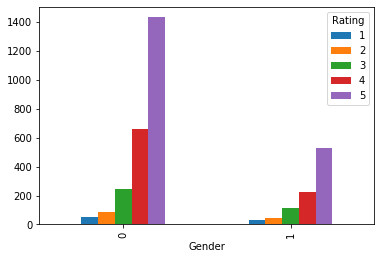

In [50]:
AB.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

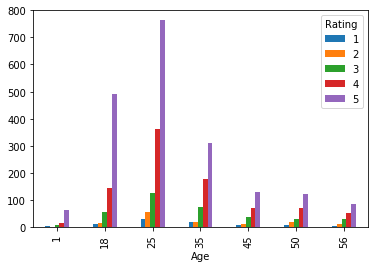

In [51]:
AB.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

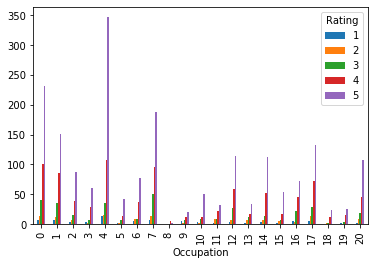

In [52]:
AB.groupby(["Occupation","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)
plt.show()

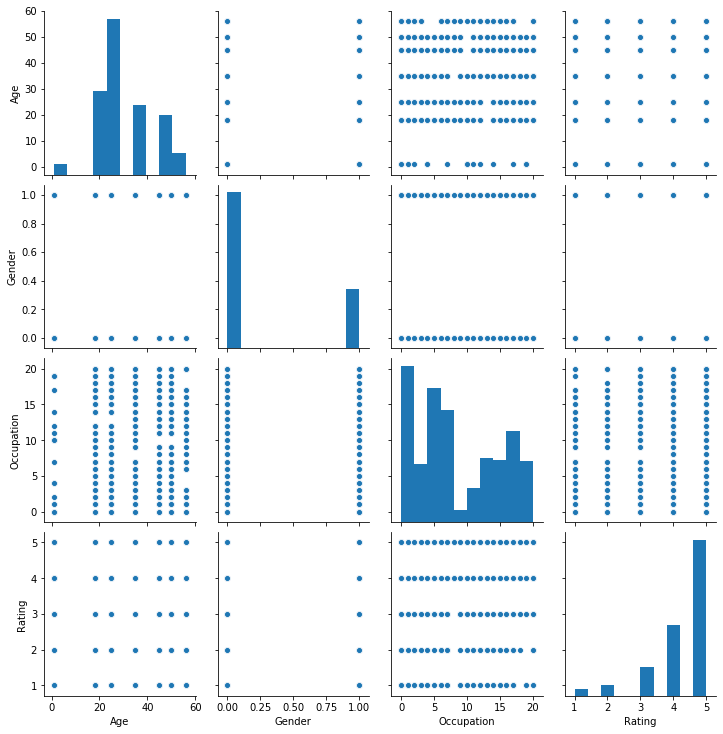

In [53]:
import seaborn as sns

data=AB[['Age','Gender','Occupation','Rating']]
sns.pairplot(data)

In [54]:
X=AB[['Age','Gender','Occupation']]
X.head()

,Age,Gender,Occupation
0,56,0,16
1,25,0,7
2,50,0,1
3,18,1,3
4,1,0,10


In [55]:
Y=AB['Rating']
Y.head()

0    4
1    4
2    5
3    5
4    5
Name: Rating, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


In [57]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size =0.20, random_state = 0)

In [58]:
print(X_train.shape)
print(len(Y_test))

(2742, 3)
686


In [59]:
Y_train.head()

2722    5
1737    3
1679    5
825     5
1223    5
Name: Rating, dtype: int64

In [60]:
from sklearn.ensemble import GradientBoostingClassifier

In [61]:
gbrt=GradientBoostingClassifier(random_state=0,learning_rate=0.01)
gbrt.fit(X_train,Y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [62]:
pred=gbrt.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
gbrt_score=accuracy_score(pred,Y_test)
gbrt_score

0.5787172011661808

In [64]:
print("Test accuracy :{:.6f}".format(gbrt.score(X_test,Y_test)))

Test accuracy :0.578717


In [65]:
print("Train accuracy :{:.2f}".format(gbrt.score(X_train,Y_train)))

Train accuracy :0.57


In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,Y_train)
Y_pred = rf.predict(X_test)
rf.score(X_train,Y_train)


0.5948212983223924

In [68]:
rf_score=accuracy_score(Y_pred,Y_test)
rf_score

0.5408163265306123

In [69]:
print("Test accuracy :{:.6f}".format(rf.score(X_test,Y_test)))

Test accuracy :0.540816


In [70]:
from sklearn.linear_model import Perceptron

In [71]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
p_score=accuracy_score(Y_pred,Y_test)
p_score

0.577259475218659

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
# Decision Tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train, Y_train)
Y_pred = dtree.predict(X_test)
dt_score=accuracy_score(Y_pred,Y_test)

In [74]:
dt_score

0.5306122448979592

In [75]:
from sklearn.linear_model import LogisticRegression

In [76]:
# Logistic Regression

logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
lg_score=accuracy_score(Y_pred,Y_test)
lg_score

/home/martha/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.577259475218659

In [77]:
from sklearn.linear_model import SGDClassifier


In [78]:
sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
sgd_score=accuracy_score(Y_pred,Y_test)
sgd_score

0.2886297376093295

In [79]:
from sklearn.svm import SVC, LinearSVC

In [80]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
svc_score=accuracy_score(Y_pred,Y_test)

/home/martha/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [81]:
svc_score

0.5379008746355685

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
gauss_score=accuracy_score(Y_pred,Y_test)
gauss_score

0.577259475218659

In [84]:

from sklearn.neighbors import KNeighborsClassifier


In [85]:
# K Nearest Neighbors Classifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
knn_score=accuracy_score(Y_pred,Y_test)
knn_score

0.42128279883381925

In [86]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
Svc_score=accuracy_score(Y_pred,Y_test)
Svc_score

0.577259475218659

In [87]:
models = pd.DataFrame({
    'Model': ['GradientBoosting', 'Random Forest', 'Perceptron', 'Decision Tree',
              'Logistic Regression', 'Stochastic Gradient Decent', 'Linear SVC', 
               'Gaussian Naive Bayes', 'KNN','SVC' ],
               
            
    'Score': [gbrt_score,rf_score,p_score,dt_score,lg_score,sgd_score,svc_score,
             gauss_score,knn_score,Svc_score]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,GradientBoosting,0.578717
2,Perceptron,0.577259
4,Logistic Regression,0.577259
7,Gaussian Naive Bayes,0.577259
9,SVC,0.577259
1,Random Forest,0.540816
6,Linear SVC,0.537901
3,Decision Tree,0.530612
8,KNN,0.421283
5,Stochastic Gradient Decent,0.288630


#####  HYPERPARAMETER TUNING FOR  GRADIENTBOOSTING

In [88]:
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold


In [98]:
model=GradientBoostingClassifier()
grid={'n_estimators':[60,70,80,90,100,110,120],
      'learning_rate':[0.005,0.007,0.01,0.02,0.05,0.07,0.09,0.1],
      'max_depth':[1,2,3,4,5], 'min_samples_split':[2,3,4],
      'min_samples_leaf':range(1,21,2), 'max_features':[None,'auto','sqrt','log2'], 
      'subsample':[0.6,0.65,0.7,0.75,0.8,0.85,0.9,1],'criterion':['friedman_mse','mae']}

#cv=StratifiedKFold(n_splits=10)
clf=GridSearchCV(model, grid, n_jobs=-1,cv=10)
clf.fit(X_train,Y_train)
clf.best_score_, clf.best_params_

OSError: [Errno 12] Cannot allocate memory

In [ ]:


modell=


cv=StratifiedKFold(n_splits=10, random_state=0)
scores=cross_val_score(modell,X=X_train, Y=Y_train, cv=cv, n_jobs=1)
print('Cross Validation Accuracy scores: %s' % scores)


print('Cross Validation Accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))

In [ ]:
#using python code. same as cell below
pipeline/model=...

skf=StratifiedKFold(n_splits=10)
kf=skf.split(X_train,Y_train)
scores=[]

for k,(train,test) in enumerate(kf):
    model/pipeline.fit(X_train.iloc[train, :],Y_train.iloc[train])
    score=pipeline.score(X_train.iloc[test,:],Y_train.iloc[test])
    scores.append(score)
    print('Fold: %2d, Training/Test Split Distribution: $s, Accuracy: %.3f' 
          %(k+1, np.bincount(Y_train.iloc[train]), score))
    
    
print('\n\nCross-Validation Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

In [ ]:
pred = clf.predict(X_test)
clf_score=accuracy_score(pred,Y_test)
clf_score


 Exploring

In [45]:
movies.Genres.str.split('|',expand=True)

,0,1,2,3,4,5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None
...,...,...,...,...,...,...
3878,Comedy,None,None,None,None,None
3879,Drama,None,None,None,None,None
3880,Drama,None,None,None,None,None
3881,Drama,None,None,None,None,None


In [46]:
movies[['genre1','genre2','genre3','genre4','genre5','genre6']]=movies.Genres.str.split('|',expand=True)

In [47]:
movies.head()

,MovieID,Title,Genres,genre1,genre2,genre3,genre4,genre5,genre6
0,1,Toy Story (1995),Animation|Children's|Comedy,Animation,Children's,Comedy,None,None,None
1,2,Jumanji (1995),Adventure|Children's|Fantasy,Adventure,Children's,Fantasy,None,None,None
2,3,Grumpier Old Men (1995),Comedy|Romance,Comedy,Romance,None,None,None,None
3,4,Waiting to Exhale (1995),Comedy|Drama,Comedy,Drama,None,None,None,None
4,5,Father of the Bride Part II (1995),Comedy,Comedy,None,None,None,None,None


In [48]:
tab=pd.merge(ratings,movies)
tab
table=pd.merge(tab,users)
table
workn_table=table.drop(['Timestamp','genre1','genre2','genre3','genre4','genre5','genre6','Zip-code'],axis=1)
workn_table

,UserID,MovieID,Rating,Title,Genres,Gender,Age,Occupation
0,1,1193,5,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10
1,1,661,3,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10
2,1,914,3,My Fair Lady (1964),Musical|Romance,F,1,10
3,1,3408,4,Erin Brockovich (2000),Drama,F,1,10
4,1,2355,5,"Bug's Life, A (1998)",Animation|Children's|Comedy,F,1,10
...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,Footloose (1984),Drama,M,45,5
1000205,4211,3806,3,MacKenna's Gold (1969),Western,M,45,5
1000206,4211,3840,4,Pumpkinhead (1988),Horror,M,45,5
1000207,4211,3766,2,Missing in Action (1984),Action|War,M,45,5


In [59]:
movy=movie.drop('Genres',axis=1)
movy

,MovieID,Title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)
...,...,...
3878,3948,Meet the Parents (2000)
3879,3949,Requiem for a Dream (2000)
3880,3950,Tigerland (2000)
3881,3951,Two Family House (2000)
